In [1]:
versioninfo()

Julia Version 1.12.0
Commit b907bd0600 (2025-10-07 15:42 UTC)
Build Info:
  Official https://julialang.org release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × 12th Gen Intel(R) Core(TM) i5-1240P
  WORD_SIZE: 64
  LLVM: libLLVM-18.1.7 (ORCJIT, alderlake)
  GC: Built with stock GC
Threads: 1 default, 1 interactive, 1 GC (on 16 virtual cores)


In [2]:
import Pkg
Pkg.activate(pwd())
Pkg.status()

  Activating project at `C:\Users\ALEKHYA\Downloads\Churn_prediction_project`


Status `C:\Users\ALEKHYA\Downloads\Churn_prediction_project\Project.toml`
  [336ed68f] CSV v0.10.15
⌅ [324d7699] CategoricalArrays v0.10.8
  [a93c6f00] DataFrames v1.8.0
  [31c24e10] Distributions v0.25.122
  [da1fdf0e] FreqTables v1.0.0
  [09f84164] HypothesisTests v0.11.5
  [c709b415] Imbalance v0.1.6
  [add582a8] MLJ v0.21.0
  [d491faf4] MLJModels v0.18.1
  [91a5bcdd] Plots v1.41.1
  [ce6b1742] RDatasets v0.7.7
  [8e980c4a] Shapefile v0.13.3
  [860ef19b] StableRNGs v1.0.3
  [10745b16] Statistics v1.11.1
  [2913bbd2] StatsBase v0.34.6
  [f3b207a7] StatsPlots v0.15.8
  [37e2e46d] LinearAlgebra v1.12.0
  [9a3f8284] Random v1.11.0
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [3]:
using Plots, CSV, DataFrames

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] 

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] 
[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0] (cache misses: wrong dep version loaded (2))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


In [36]:
#Reading the CSV files
using CSV, DataFrames
dfcl = CSV.File("telco_cleaned.csv") |> DataFrame
dfbl = CSV.File("telco_balanced_undersampling.csv") |> DataFrame

Row,latitude,longitude,gender__Female,gender__Male,senior_citizen__No,senior_citizen__Yes,partner__No,partner__Yes,dependents__No,dependents__Yes,tenure_months,phone_service__No,phone_service__Yes,multiple_lines__No,multiple_lines__No phone service,multiple_lines__Yes,internet_service__DSL,internet_service__Fiber optic,internet_service__No,device_protection__No,device_protection__No internet service,device_protection__Yes,tech_support__No,tech_support__No internet service,tech_support__Yes,contract__Month-to-month,contract__One year,contract__Two year,paperless_billing__No,paperless_billing__Yes,payment_method__Bank transfer (automatic),payment_method__Credit card (automatic),payment_method__Electronic check,payment_method__Mailed check,monthly_charges,total_charges,churn_value,cltv
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.573366,-1.22636,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.99497,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.508602,-0.707615,1,0.566261
2,0.0873688,0.238104,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.99497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.49399,-0.942618,0,-0.965351
3,-0.838534,0.627439,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.19867,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.151293,-0.922877,1,-0.745462
4,-0.0026167,1.28194,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.12357,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.48414,1.89236,0,-0.0435085
5,-1.11668,1.24682,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.023557,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.302526,0.0537106,1,0.822516
6,0.836512,-0.535314,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.91986,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.19995,1.39639,0,1.48134
7,-1.10504,1.00073,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.57172,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.289231,1.35631,0,0.870723
8,-1.0304,0.736229,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.709782,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.156279,-0.534637,0,-1.07699
9,0.953871,-0.708567,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.587559,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.782816,-0.284105,1,1.12106


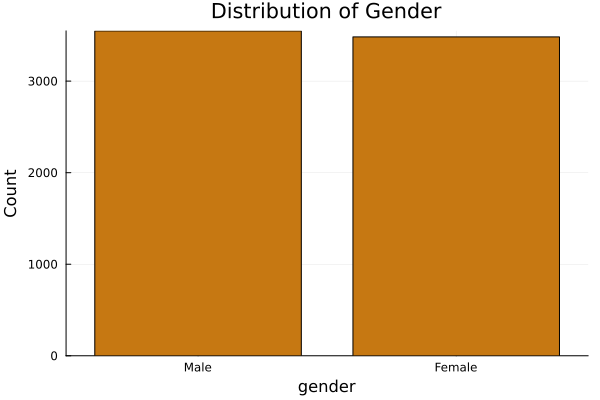

"C:\\Users\\ALEKHYA\\Downloads\\Churn_prediction_project\\Distribution_of_Gender.png"

In [13]:
# Plot a bar chart for gender with a transparent background for the entire plot
variable_name = :gender 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
p = bar(counts[!, variable_name], counts[!, :count], legend=false,
        color="#C67812", xlabel=String(variable_name), ylabel="Count",
        title="Distribution of Gender",
        background=false)

display(p)
savefig(p, "Distribution_of_Gender.png")

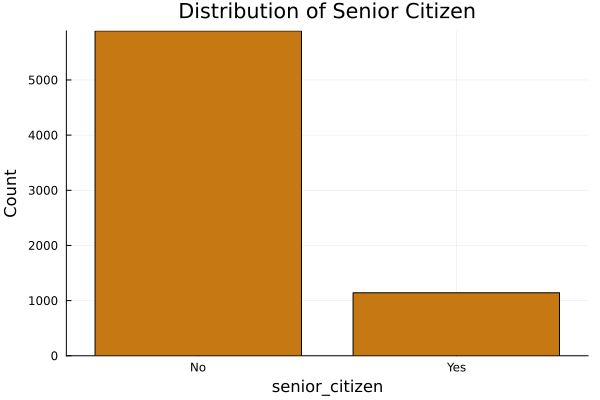

In [14]:
# Plot a bar chart for senior_citizen
variable_name = :senior_citizen 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Senior Citizen")
     


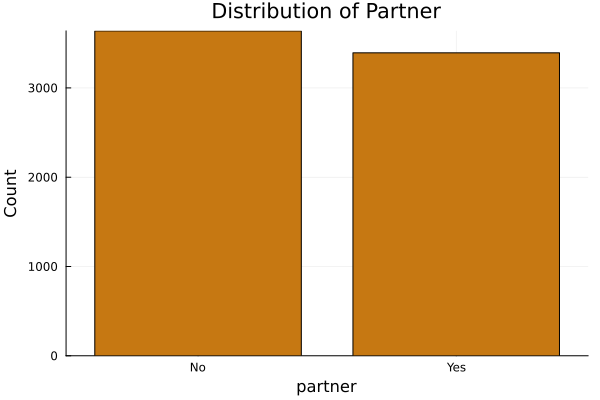

In [15]:

# Plot a bar chart for partner
variable_name = :partner 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Partner")
     


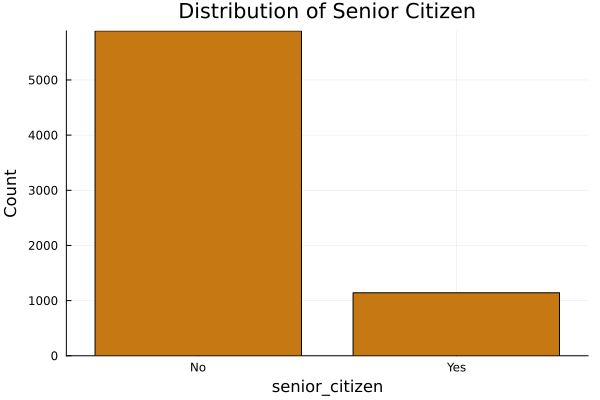

In [16]:
# Plot a bar chart for senior citizen
variable_name = :senior_citizen 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Senior Citizen")
     


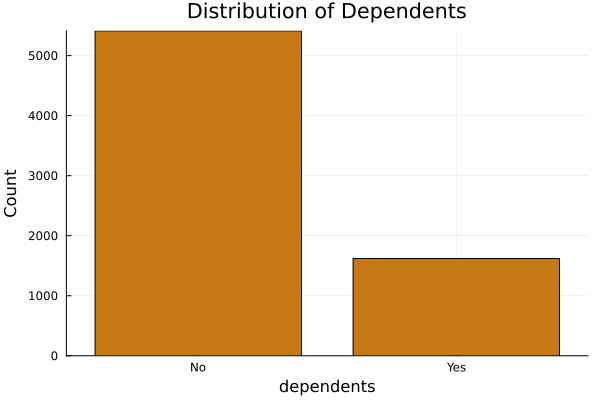

In [17]:
# Plot a bar chart for dependents
variable_name = :dependents 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Dependents")
     


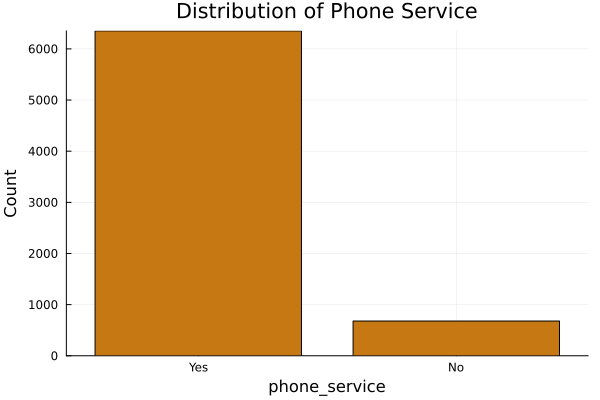

In [18]:
# Plot a bar chart for phone_service
variable_name = :phone_service 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Phone Service")
     


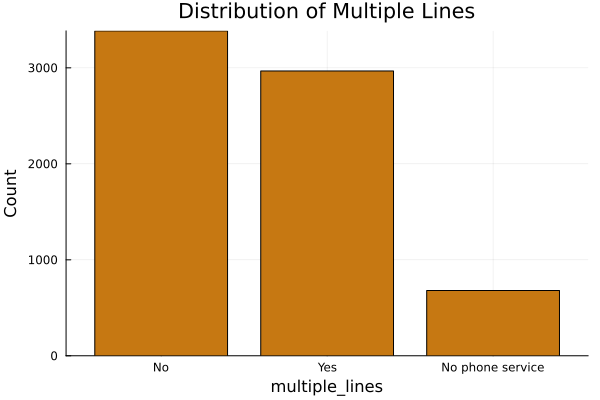

In [19]:
# Plot a bar chart for multiple_lines
variable_name = :multiple_lines 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Multiple Lines")
     


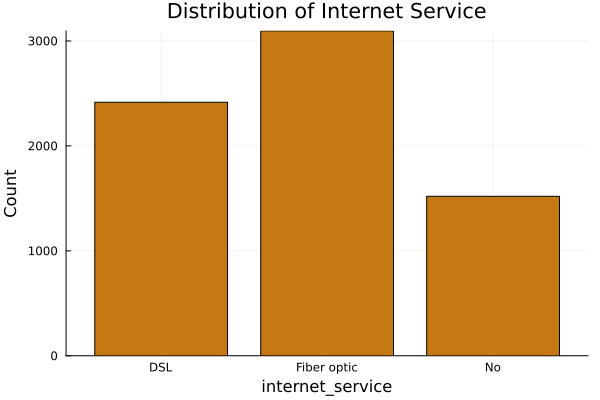

In [20]:
# Plot a bar chart for internet_service
variable_name = :internet_service 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Internet Service")
     

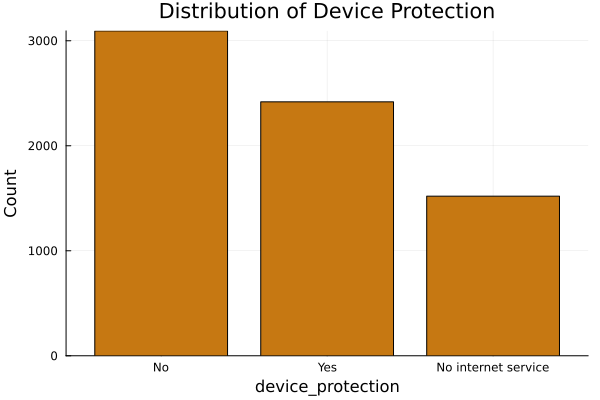

In [21]:
# Plot a bar chart for device_protection
variable_name = :device_protection 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Device Protection")
     


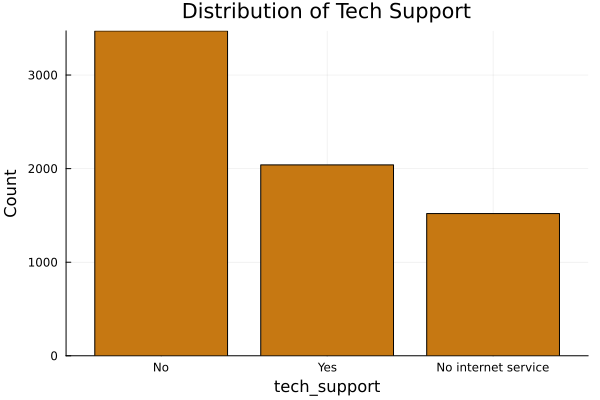

In [22]:
# Plot a bar chart for tech_support
variable_name = :tech_support 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Tech Support")
     


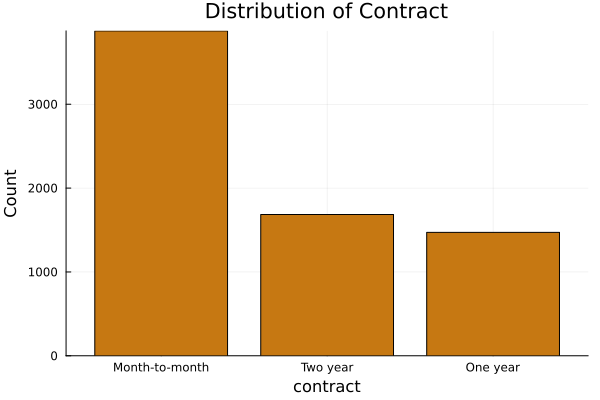

In [23]:
# Plot a bar chart for contract
variable_name = :contract 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Contract")
     

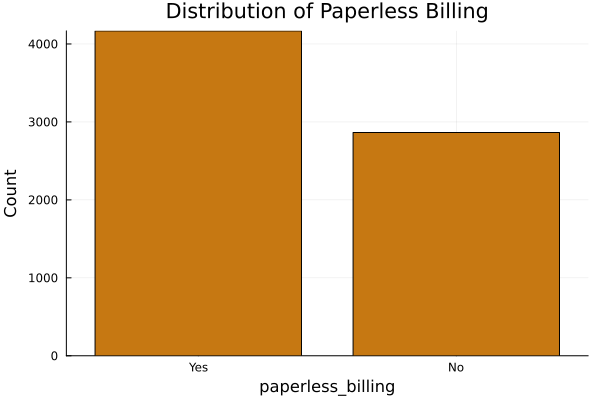

In [24]:

# Plot a bar chart for paperless_billing
variable_name = :paperless_billing 
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Paperless Billing")
     


In [25]:
using DataFrames

# Assuming df is your DataFrame containing telecom data
dfcl = DataFrame(
    customer_id = 1:5,
    payment_method = ["Bank transfer (automatic)", "Credit card (automatic)", "Mailed check", "Electronic check", "Bank transfer (automatic)"]
)

# Define a function to replace the values
function replace_payment_method(method::String)
    if method == "Mailed check" || method == "Electronic check"
        return method
    elseif method == "Bank transfer (automatic)"
        return "Bank transfer"
    elseif method == "Credit card (automatic)"
        return "Credit card"
    else
        return method
    end
end

# Apply the function to the payment_method column
dfcl.payment_method = replace_payment_method.(dfcl.payment_method)

# Display the modified DataFrame
println(dfcl)


5×2 DataFrame
 Row │ customer_id  payment_method   
     │ Int64        String           
─────┼───────────────────────────────
   1 │           1  Bank transfer
   2 │           2  Credit card
   3 │           3  Mailed check
   4 │           4  Electronic check
   5 │           5  Bank transfer


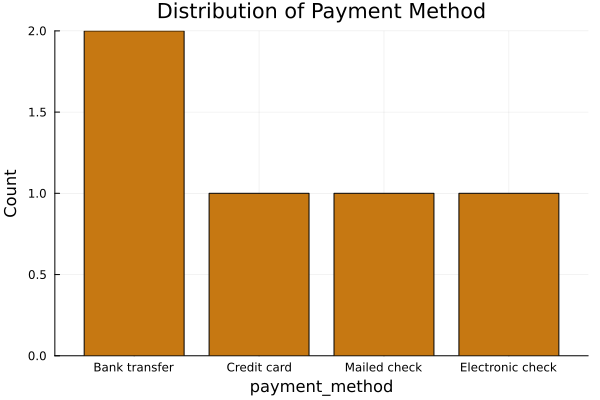

In [26]:
using Plots
# Plot a bar chart for payment_method 
variable_name = :payment_method  
data = groupby(dfcl, variable_name)
counts = combine(data, variable_name => length => :count)
Plots.bar(counts[!, variable_name], counts[!, :count], legend=false, color="#C67812", xlabel=String(variable_name), ylabel="Count", title="Distribution of Payment Method")
     

In [27]:

using Pkg
Pkg.add("Colors")


    Updating registry at `C:\Users\ALEKHYA\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\ALEKHYA\Downloads\Churn_prediction_project\Project.toml`
  [5ae59095] + Colors v0.13.1
    Manifest No packages added to or removed from `C:\Users\ALEKHYA\Downloads\Churn_prediction_project\Manifest.toml`
Precompiling packages...
   7227.9 ms  ✓ DataScienceTraits → DataScienceTraitsColorTypesExt
   6616.4 ms  ✓ Transducers → TransducersDataFramesExt
   7246.3 ms  ✓ Widgets
   8103.5 ms  ✓ StaticArrays → StaticArraysStatisticsExt
   7221.5 ms  ✓ EarlyStopping
   7239.0 ms  ✓ Ratios → RatiosFixedPointNumbersExt
   7263.5 ms  ✓ Distances
   6261.6 ms  ✓ ColorVectorSpace → SpecialFunctionsExt
   9258.7 ms  ✓ CategoricalArrays
   2040.5 ms  ✓ BangBang → BangBangDataFramesExt
   1477.5 ms  ✓ Distances → DistancesSparseArraysExt
   1160.7 ms  ✓ Distances → DistancesChainRulesCoreExt
   2381.9 ms  ✓ SpectralIndices → SpectralIndicesDataFramesExt
   2644.8 ms  ✓ Lat

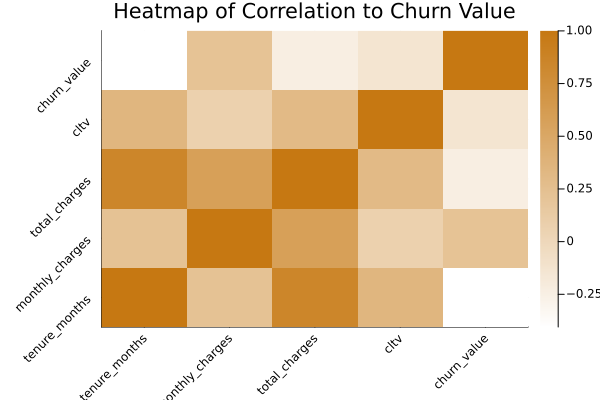

In [28]:
using CSV, DataFrames, Plots, Statistics, Colors
gr()

# Select the numerical columns 
numerical_cols = select(dfbl, [:tenure_months, :monthly_charges, :total_charges, :cltv, :churn_value])

# Calculate the correlation matrix
corr_matrix = cor(Matrix(numerical_cols))

# Create a custom colormap using the specified color #C67812
custom_color = parse(Colorant, "#C67812")
custom_colormap = [colorant"white", custom_color] # Gradient from white to the specified color

# Plot the heatmap with colormap and slant text
h=heatmap(corr_matrix, color=custom_colormap, aspect_ratio=:auto,
        xticks=(1:length(names(numerical_cols)), names(numerical_cols)),
        yticks=(1:length(names(numerical_cols)), names(numerical_cols)),
        title="Heatmap of Correlation to Churn Value",
        xrotation=45, yrotation=45)

# Save the plot
savefig("correlation_heatmap_custom_color.png")

display(h)

In [33]:

using CSV, DataFrames, Plots

# Load the balanced dataset
df = CSV.read("telco_standardized.csv", DataFrame)
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,latitude,8.16437e-16,-1.51763,0.0441632,2.31211,0,Float64
2,longitude,-5.09263e-16,-2.08666,0.0295724,2.59842,0,Float64
3,gender__Female,0.495307,0.0,0.0,1.0,0,Float64
4,gender__Male,0.504693,0.0,1.0,1.0,0,Float64
5,senior_citizen__No,0.8376,0.0,1.0,1.0,0,Float64
6,senior_citizen__Yes,0.1624,0.0,0.0,1.0,0,Float64
7,partner__No,0.517491,0.0,1.0,1.0,0,Float64
8,partner__Yes,0.482509,0.0,0.0,1.0,0,Float64
9,dependents__No,0.769625,0.0,1.0,1.0,0,Float64


In [52]:

import Pkg
Pkg.add("GLM")

   Resolving package versions...
   Installed GLM ─────────── v1.9.0
   Installed ShiftedArrays ─ v2.0.0
   Installed StatsModels ─── v0.7.7
    Updating `C:\Users\ALEKHYA\Downloads\Churn_prediction_project\Project.toml`
  [38e38edf] + GLM v1.9.0
    Updating `C:\Users\ALEKHYA\Downloads\Churn_prediction_project\Manifest.toml`
  [38e38edf] + GLM v1.9.0
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.7
Precompiling packages...
    739.9 ms  ✓ ShiftedArrays
   1973.5 ms  ✓ StatsModels
   1840.0 ms  ✓ GLM
  3 dependencies successfully precompiled in 6 seconds. 405 already precompiled.


In [53]:
using CSV, DataFrames, StatsPlots, CategoricalArrays

# Load your DataFrame from a CSV file (assuming the rest of your data processing is as described above)
# df = CSV.read("your_data.csv", DataFrame)

# Assuming the rest of your data processing code remains the same and 'grouped' DataFrame is ready

# Convert to categorical if not already (ensuring correct ordering if necessary)
grouped[!, :internet_service] = categorical(grouped[!, :internet_service])
grouped[!, :churn_value] = categorical(grouped[!, :churn_value], ordered=true)

# Assigning colors to each group in the order they appear
# Assuming "Yes" and "No" are the only two categories and in that order
colors = ["#c67812", :black]  # Custom colors for "Yes" and "No"

# Create the 100% stacked bar chart
p = groupedbar(grouped[!, :internet_service], grouped[!, :rate], 
               group=grouped[!, :churn_value], 
               xlabel="Internet Service", ylabel="Percentage", 
               bar_position=:stack, legend=:outerright, 
               seriescolor=colors)  # Using seriescolor here

title!("Bar Chart by Internet Service and Churn Value")
plot!(size=(600, 400))

# Display the plot
display(p)

LoadError: UndefVarError: `grouped` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [54]:
using CategoricalArrays

# Assuming your DataFrame 'grouped' is correctly prepared as per your description.

# Ensure the categorical variables are correctly typed
grouped[!, :internet_service] = CategoricalArray(grouped[!, :internet_service])
grouped[!, :churn_value] = CategoricalArray(grouped[!, :churn_value])

# Sort or order categorical levels if necessary (optional)
# grouped[!, :churn_value] = categorical(grouped[!, :churn_value], ordered=true, levels=["No", "Yes"])

# Create the 100% stacked bar chart with custom colors
p = groupedbar(grouped[!, :internet_service], grouped[!, :rate], 
               group=grouped[!, :churn_value], 
               xlabel="Internet Service", ylabel="Percentage", 
               bar_position=:stack, legend=:outerright, 
               color=[:black, "#c67812"]) # Adjust colors based on the order of churn_value categories

title!("Bar Chart by Internet Service and Churn Value")
plot!(size=(600, 400))

# Display the plot
display(p)

LoadError: UndefVarError: `grouped` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

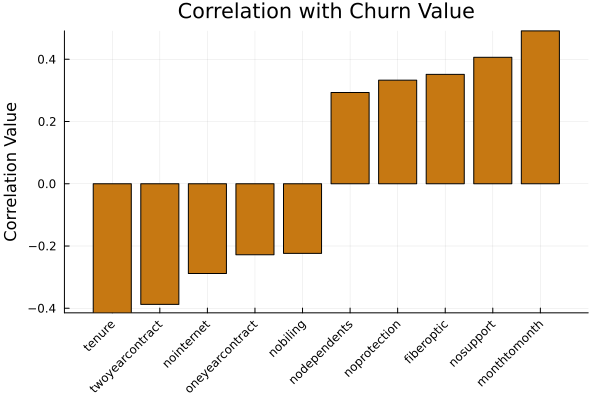

In [56]:
using StatsPlots

# Define the variables and their correlation values
variables = ["tenure", "twoyearcontract", "nointernet",  "oneyearcontract",
             "nobiling", "nodependents","noprotection", "fiberoptic", "nosupport",
             "monthtomonth"]

correlation_values = [-0.4147, -0.3876, -0.2884, -0.2281, -0.2236, 0.2931, 0.3327,  0.3515,   0.4063,
                      0.4912]


# Create a vertical bar chart with the sorted variables and their correlation values
p = bar(variables, correlation_values, 
        xlabel="Variables", ylabel="Correlation Value", 
        title="Correlation with Churn Value", color="#c67812", 
        legend=false, xrotation=45)

# Show the plot
display(p)